**Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Displaying all the columns of the dataset**

In [2]:
pd.pandas.set_option("display.max_columns", None)

In [3]:
dataset = pd.read_csv("/content/winequality-white.csv", sep=';')

In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Print the shape of dataset with rows and columns**

In [5]:
print(dataset.shape)

(4898, 12)


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Finding out missisng values in the data**

In [7]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Finding out highly correlated input parameters**

In [8]:
corr_related = dataset.corr(method='pearson')

<Axes: >

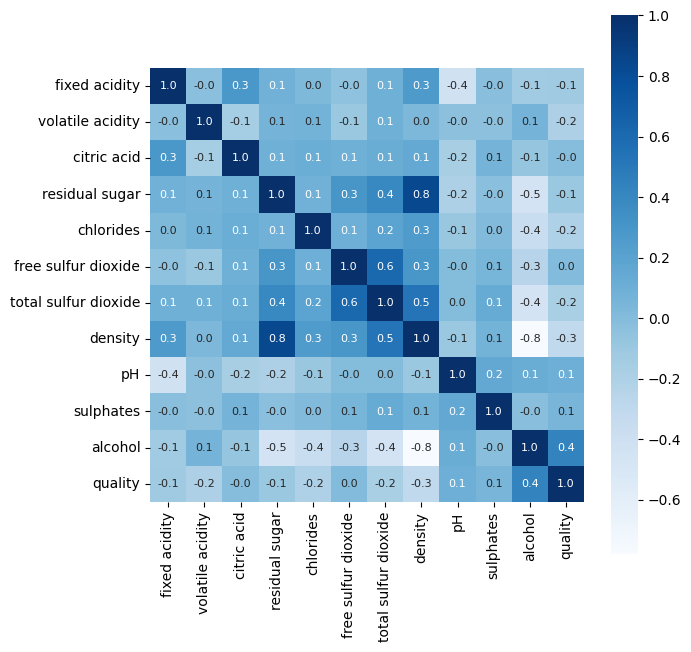

In [9]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(7,7))
sns.heatmap(corr_related, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

**`Data with correlation features removed`**

In [10]:
non_correlated_wine_data = dataset.drop(["density","total sulfur dioxide"], axis=1)

<Axes: >

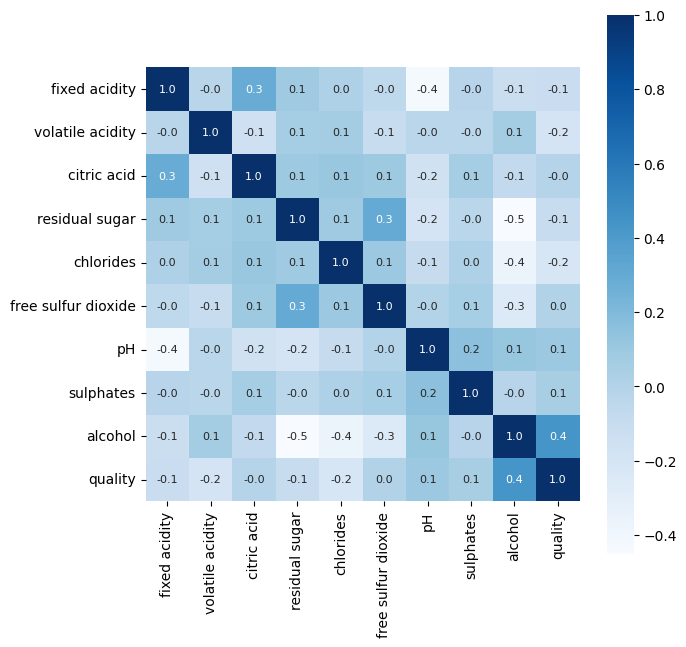

In [11]:
corr_no_related = non_correlated_wine_data.corr(method='pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr_no_related, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

**Check the statistical parameters of the non-correlated features**

In [12]:
non_correlated_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,3.820000,1.080000,14.200000,9.000000


**Data splitting into input and target**

In [13]:
input_data = non_correlated_wine_data.drop('quality',axis=1)

In [14]:
input_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,3.34,0.38,12.8


In [15]:
target_data = non_correlated_wine_data['quality'].apply(lambda y_value: 'Good' if y_value>=7 else 'Bad')

In [16]:
target_data

0        Bad
1        Bad
2        Bad
3        Bad
4        Bad
        ... 
4893     Bad
4894     Bad
4895     Bad
4896    Good
4897     Bad
Name: quality, Length: 4898, dtype: object

**Normalizing the input data**

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataset
normalized_input_data = scaler.fit_transform(input_data)

# Convert the normalized dataset back to a DataFrame (optional)
normalized_input_data = pd.DataFrame(normalized_input_data, columns=input_data.columns)

# Summary statistics of the normalized dataset
print("Summary statistics of the normalized dataset:")
print(normalized_input_data.describe())

Summary statistics of the normalized dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        0.293730          0.194354     0.201320        0.088825   
std         0.081141          0.098818     0.072903        0.077792   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.240385          0.127451     0.162651        0.016871   
50%         0.288462          0.176471     0.192771        0.070552   
75%         0.336538          0.235294     0.234940        0.142638   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide           pH    sulphates      alcohol  
count  4898.000000          4898.000000  4898.000000  4898.000000  4898.000000  
mean      0.109117             0.116056     0.425697     0.313775     0.405527  
std       0.064831             0.059258     0.137273     0.132704     0

**Making prediction using Random forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(normalized_input_data, target_data)

# Perform cross-validation
accuracy_scores_rf = cross_val_score(rf_model, normalized_input_data, target_data, cv=5, scoring='accuracy')

# Print mean accuracy score from cross-validation
print("Mean Accuracy Score from Cross-Validation:", accuracy_scores_rf.mean())



Mean Accuracy Score from Cross-Validation: 0.809301869879719


In [22]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Making prediction using SVM**

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize Support Vector Classifier (SVC) model
svm_model = SVC()

# Fit the model
svm_model.fit(normalized_input_data, target_data)

# Perform cross-validation
accuracy_scores_svm = cross_val_score(svm_model, normalized_input_data, target_data, cv=5, scoring='accuracy')

# Print mean accuracy score from cross-validation
print("Mean Accuracy Score from Cross-Validation:", accuracy_scores_svm.mean())


Mean Accuracy Score from Cross-Validation: 0.804816660065456


In [24]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Making prediction using Logistic regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(normalized_input_data, target_data)

# Perform cross-validation
accuracy_scores_lr = cross_val_score(logistic_model, normalized_input_data, target_data, cv=5, scoring='accuracy')

# Print mean accuracy score from cross-validation
print("Mean Accuracy Score from Cross-Validation:", accuracy_scores_lr.mean())


Mean Accuracy Score from Cross-Validation: 0.7990992474620083


In [27]:
logistic_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Making prediction using Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize Decision Tree Classifier model
tree_model = DecisionTreeClassifier()

# Fit the model
tree_model.fit(normalized_input_data, target_data)

# Perform cross-validation
accuracy_scores_dt = cross_val_score(tree_model, normalized_input_data, target_data, cv=5, scoring='accuracy')

# Print mean accuracy score from cross-validation
print("Mean Accuracy Score from Cross-Validation:", accuracy_scores_dt.mean())


Mean Accuracy Score from Cross-Validation: 0.739269350232432


In [29]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**Making prediction using Gradient boosting**

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Initialize Gradient Bossting Classifier model
gradient_boosting = GradientBoostingClassifier()

# Fit the model
gradient_boosting.fit(normalized_input_data, target_data)

# Perform cross-validation
accuracy_scores_gb = cross_val_score(gradient_boosting, normalized_input_data, target_data, cv=5, scoring='accuracy')

# Print mean accuracy score from cross-validation
print("Mean Accuracy Score from Cross-Validation:", accuracy_scores_gb.mean())


Mean Accuracy Score from Cross-Validation: 0.7982754163974067


In [31]:
gradient_boosting.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

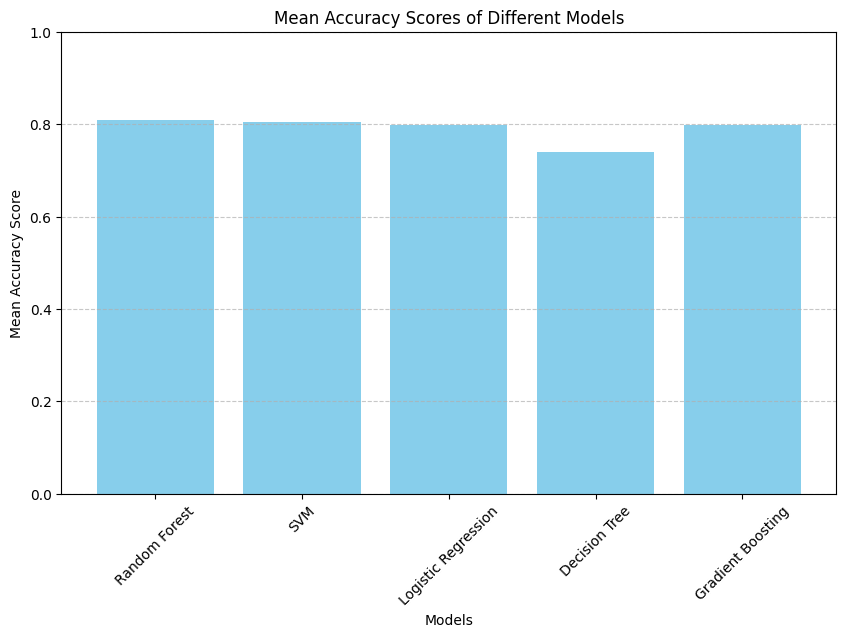

Mean Accuracy Scores:
Random Forest: 0.809301869879719
SVM: 0.804816660065456
Logistic Regression: 0.7990992474620083
Decision Tree: 0.739269350232432
Gradient Boosting: 0.7982754163974067


In [32]:
import matplotlib.pyplot as plt

# List of models and their accuracy scores
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting']
accuracy_scores = [accuracy_scores_rf.mean(), accuracy_scores_svm.mean(), accuracy_scores_lr.mean(),
                   accuracy_scores_dt.mean(), accuracy_scores_gb.mean()]

# Plotting the mean accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.title('Mean Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy Score')
plt.ylim(0, 1)  # Setting y-axis limit
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Printing the mean accuracy scores
print("Mean Accuracy Scores:")
for model, score in zip(models, accuracy_scores):
    print(f"{model}: {score}")
